<a href="https://colab.research.google.com/github/Ashahet1/Google-Colab/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to Pandas
https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook


**Basic data structures in pandas**
Pandas provides two types of classes for handling data:

**Series**: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

**DataFrame**: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [2]:
# Creating a Series by passing a list of values, letting pandas create a default RangeIndex
import pandas as pd
import numpy as np

In [5]:
s=pd.Series([1,3,4, np.nan,6,8])
s

,0
0,1.0
1,3.0
2,4.0
3,NaN
4,6.0
5,8.0


In [9]:
# Creating a DataFrame by passing a Numpy array with a datetime index using data_range() and labeled columns:
dates = pd.date_range("20130101", periods=6)
dates
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-05,-0.989937,2.122368,0.804115,-1.451181
2013-01-06,0.017010,0.089825,0.120648,-0.886765


In [13]:
# Creating a DataFrame by passing a dictionary of objects where the keys are the column labels and the values are the column values
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
    )
df2
df2.dtypes

,0
A,float64
B,datetime64[s]
C,float32
D,int32
E,category
F,object


## Viewing Data
# Use DataFrame.head() and DataFrame.tall() to view the top and bottom rows of the frame respectively:



In [14]:
df.head()

,A,B,C,D
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-05,-0.989937,2.122368,0.804115,-1.451181


In [15]:
df.tail(3)

,A,B,C,D
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-05,-0.989937,2.122368,0.804115,-1.451181
2013-01-06,0.017010,0.089825,0.120648,-0.886765


In [17]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.to_numpy() # without the index

array([[-0.43039782,  1.53205434,  0.51829266,  0.56739626],
       [ 0.01443374, -1.12178063, -1.68311526,  2.00956069],
       [ 0.48385508,  0.18257096,  1.14770177, -1.95685963],
       [ 1.53086435,  0.19934858,  1.38156827, -1.41194711],
       [-0.98993714,  2.12236802,  0.80411474, -1.45118116],
       [ 0.01701034,  0.08982499,  0.12064794, -0.8867654 ]])

In [19]:
df.describe() # Shows the quick summary of the Statistics


,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.104305,0.500731,0.381535,-0.521633
std,0.857683,1.156441,1.105911,1.512802
min,-0.989937,-1.121781,-1.683115,-1.956860
25%,-0.319190,0.113011,0.220059,-1.441373
50%,0.015722,0.190960,0.661204,-1.149356
75%,0.367144,1.198878,1.061805,0.203856
max,1.530864,2.122368,1.381568,2.009561


In [20]:
# Okay Transposing the data mean changing col = row and row = col

df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.430398,0.014434,0.483855,1.530864,-0.989937,0.017010
B,1.532054,-1.121781,0.182571,0.199349,2.122368,0.089825
C,0.518293,-1.683115,1.147702,1.381568,0.804115,0.120648
D,0.567396,2.009561,-1.956860,-1.411947,-1.451181,-0.886765


In [21]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.567396,0.518293,1.532054,-0.430398
2013-01-02,2.009561,-1.683115,-1.121781,0.014434
2013-01-03,-1.956860,1.147702,0.182571,0.483855
2013-01-04,-1.411947,1.381568,0.199349,1.530864
2013-01-05,-1.451181,0.804115,2.122368,-0.989937
2013-01-06,-0.886765,0.120648,0.089825,0.017010


In [22]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-06,0.017010,0.089825,0.120648,-0.886765
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-05,-0.989937,2.122368,0.804115,-1.451181


In [23]:
df.sort_values(by="B", ascending=False) # By Default ascending is True

,A,B,C,D
2013-01-05,-0.989937,2.122368,0.804115,-1.451181
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-06,0.017010,0.089825,0.120648,-0.886765
2013-01-02,0.014434,-1.121781,-1.683115,2.009561


In [24]:
df.sort_values(by="A", ascending=True)

,A,B,C,D
2013-01-05,-0.989937,2.122368,0.804115,-1.451181
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-06,0.017010,0.089825,0.120648,-0.886765
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-04,1.530864,0.199349,1.381568,-1.411947


##**Selection**
While standard Python / NumPy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, DataFrame.at(), DataFrame.iat(), DataFrame.loc() and DataFrame.iloc().


In [25]:
# Get Item []
df["A"]

,A
2013-01-01,-0.430398
2013-01-02,0.014434
2013-01-03,0.483855
2013-01-04,1.530864
2013-01-05,-0.989937
2013-01-06,0.017010


In [26]:
# Passing a Slice
df[0:3]

,A,B,C,D
2013-01-01,-0.430398,1.532054,0.518293,0.567396
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-03,0.483855,0.182571,1.147702,-1.956860


## Selection by label
See more in Selection by Label using DataFrame.loc() or DataFrame.at().

In [27]:
df.loc[dates[0]]

,2013-01-01
A,-0.430398
B,1.532054
C,0.518293
D,0.567396


In [28]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.430398,1.532054
2013-01-02,0.014434,-1.121781
2013-01-03,0.483855,0.182571
2013-01-04,1.530864,0.199349
2013-01-05,-0.989937,2.122368
2013-01-06,0.017010,0.089825


In [29]:
df.loc["20130102":"20130104", ["A", "B"]]



,A,B
2013-01-02,0.014434,-1.121781
2013-01-03,0.483855,0.182571
2013-01-04,1.530864,0.199349


In [30]:
df.loc[dates[0], "A"] # Single row and label column

-0.43039782302669394

In [31]:
df.at[dates[0], "A"]

-0.43039782302669394

## Selection by position
See more in Selection by Position using DataFrame.iloc() or DataFrame.iat().

In [32]:
df.iloc[3]

,2013-01-04
A,1.530864
B,0.199349
C,1.381568
D,-1.411947


In [34]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,1.530864,0.199349
2013-01-05,-0.989937,2.122368


In [35]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.014434,-1.683115
2013-01-03,0.483855,1.147702
2013-01-05,-0.989937,0.804115


In [36]:
df.iloc[: 1,3]

,D
2013-01-01,0.567396


In [37]:
df.iloc[1,1]

-1.1217806291576726

In [38]:
df.iat[1,1]

-1.1217806291576726

### Boolean indexing

In [41]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.014434,-1.121781,-1.683115,2.009561
2013-01-03,0.483855,0.182571,1.147702,-1.956860
2013-01-04,1.530864,0.199349,1.381568,-1.411947
2013-01-06,0.017010,0.089825,0.120648,-0.886765


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.532054,0.518293,0.567396
2013-01-02,0.014434,NaN,NaN,2.009561
2013-01-03,0.483855,0.182571,1.147702,NaN
2013-01-04,1.530864,0.199349,1.381568,NaN
2013-01-05,NaN,2.122368,0.804115,NaN
2013-01-06,0.017010,0.089825,0.120648,NaN


In [43]:
df2=df.copy()
df2["E"]=["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.430398,1.532054,0.518293,0.567396,one
2013-01-02,0.014434,-1.121781,-1.683115,2.009561,one
2013-01-03,0.483855,0.182571,1.147702,-1.956860,two
2013-01-04,1.530864,0.199349,1.381568,-1.411947,three
2013-01-05,-0.989937,2.122368,0.804115,-1.451181,four
2013-01-06,0.017010,0.089825,0.120648,-0.886765,three


In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

,0
2013-01-02,1
2013-01-03,2
2013-01-04,3
2013-01-05,4
2013-01-06,5
2013-01-07,6


## Missing Data
np.nan represents missing Data

In [45]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-0.430398,1.532054,0.518293,0.567396,1.0
2013-01-02,0.014434,-1.121781,-1.683115,2.009561,1.0
2013-01-03,0.483855,0.182571,1.147702,-1.956860,NaN
2013-01-04,1.530864,0.199349,1.381568,-1.411947,NaN


In [46]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.430398,1.532054,0.518293,0.567396,1.0
2013-01-02,0.014434,-1.121781,-1.683115,2.009561,1.0


In [47]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.430398,1.532054,0.518293,0.567396,1.0
2013-01-02,0.014434,-1.121781,-1.683115,2.009561,1.0
2013-01-03,0.483855,0.182571,1.147702,-1.956860,5.0
2013-01-04,1.530864,0.199349,1.381568,-1.411947,5.0


In [48]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

In [49]:
df.mean()


,0
A,0.104305
B,0.500731
C,0.381535
D,-0.521633


In [50]:
df.mean(axis=1)

,0
2013-01-01,0.546836
2013-01-02,-0.195225
2013-01-03,-0.035683
2013-01-04,0.424959
2013-01-05,0.121341
2013-01-06,-0.164821


## Operating with another Series or DataFrame with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimension and will fill unaligned labels with np.nan.

In [51]:
s= pd.Series([1,3,5, np.nan, 6, 8], index=dates).shift(2)
s

,0
2013-01-01,NaN
2013-01-02,NaN
2013-01-03,1.0
2013-01-04,3.0
2013-01-05,5.0
2013-01-06,NaN


## User defined functions
DataFrame.agg() and DataFrame.transform() applies a user defined function that reduces or broadcasts its result respectively.

In [53]:
df.agg(lambda x: np.mean(x) * 4.5)

,0
A,0.469371
B,2.253290
C,1.716908
D,-2.347347


## String Methods

In [54]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

,0
0,a
1,b
2,c
3,aaba
4,baca
5,NaN
6,caba
7,dog
8,cat


## Merge
# Concat
Pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [56]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,-0.527276,0.416325,0.602424,-0.313828
1,-2.027705,-0.863571,-0.978555,0.944023
2,-0.557446,-0.625317,-0.399230,0.482537
3,-0.197690,0.389449,-3.068349,0.036960
4,0.291022,-1.658712,-0.959302,-0.609796
5,0.750183,1.483039,-1.404869,1.085284
6,-1.604952,-1.015516,1.783944,0.801782
7,0.735370,-1.394394,0.148087,0.457845
8,1.780820,-1.004487,-1.990666,0.009564
9,-0.008110,-0.666376,-0.610280,-1.881169


In [59]:
# Join
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
left


,key,lval
0,foo,1
1,foo,2


In [60]:
right

,key,rval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on="key")
pd.merge(left, right, on="key", how="outer")
pd.merge(left, right, on="key", how="left")
pd.merge(left, right, on="key", how="right")

,key,lval,rval
0,foo,1,4
1,foo,2,4
2,foo,1,5
3,foo,2,5


## **Grouping**
By “group by” we are referring to a process involving one or more of the following steps:

Splitting the data into groups based on some criteria

Applying a function to each group independently

Combining the results into a data structure

In [63]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

,A,B,C,D
0,foo,one,-0.747442,-0.739415
1,bar,one,1.671718,1.522732
2,foo,two,-0.551710,-1.748322
3,bar,three,-0.320026,0.295977
4,foo,two,-1.011223,2.522297
5,bar,two,1.174214,1.330297
6,foo,one,1.605681,0.476304
7,foo,three,-0.072743,0.468536


In [65]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,2.525906,3.149007
foo,-0.777438,0.979400


In [67]:
df.groupby(["C", "D"]).sum()

,,A,B
C,D,,
-1.011223,2.522297,foo,two
-0.747442,-0.739415,foo,one
-0.551710,-1.748322,foo,two
-0.320026,0.295977,bar,three
-0.072743,0.468536,foo,three
1.174214,1.330297,bar,two
1.605681,0.476304,foo,one
1.671718,1.522732,bar,one


## $ Reshape

In [68]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]
arrays

[['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'],
 ['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two']]

In [69]:
index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [70]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.573098  0.716195
      two     1.826062 -0.803819
baz   one     0.089381 -1.785286
      two    -1.765759  0.403725

In [71]:
stacked = df2.stack(future_stack=True)
stacked # compresses a level of column

first  second   
bar    one     A   -0.573098
               B    0.716195
       two     A    1.826062
               B   -0.803819
baz    one     A    0.089381
               B   -1.785286
       two     A   -1.765759
               B    0.403725
dtype: float64

In [72]:
stacked.unstack()

A         B
first second                    
bar   one    -0.573098  0.716195
      two     1.826062 -0.803819
baz   one     0.089381 -1.785286
      two    -1.765759  0.403725

## **Time-Series**
Pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [73]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

,0
2012-01-01,25154


In [77]:
rng = pd.date_range("1/1/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize("UTC")
ts_utc

,0
2012-01-01 00:00:00+00:00,0.348843
2012-01-02 00:00:00+00:00,0.103328
2012-01-03 00:00:00+00:00,-1.107753
2012-01-04 00:00:00+00:00,-0.141082
2012-01-05 00:00:00+00:00,0.736675


In [78]:
ts_utc.tz_convert("US/Eastern")

,0
2011-12-31 19:00:00-05:00,0.348843
2012-01-01 19:00:00-05:00,0.103328
2012-01-02 19:00:00-05:00,-1.107753
2012-01-03 19:00:00-05:00,-0.141082
2012-01-04 19:00:00-05:00,0.736675


## Plotting

<Axes: >

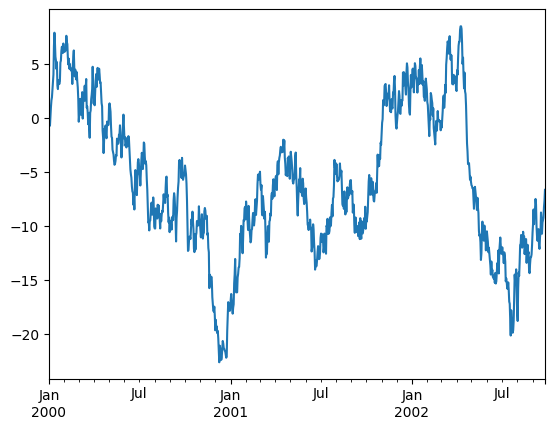

In [79]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 640x480 with 0 Axes>

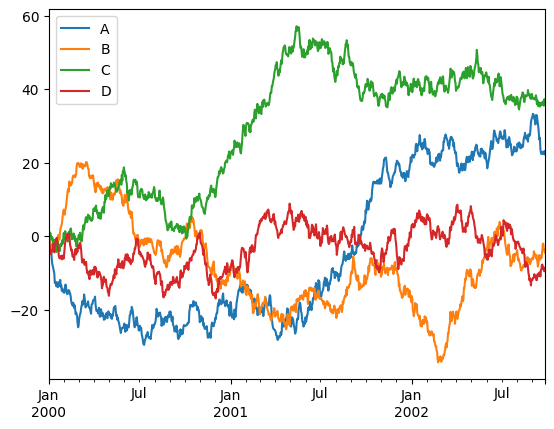

In [80]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc="best")

## Importing and Exporting CSV

In [82]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,4,0,2,3
1,1,2,1,3,0,2
2,2,2,3,3,0,4
3,3,2,1,3,0,1
4,4,4,4,0,3,4
5,5,0,1,0,0,4
6,6,1,3,2,4,3
7,7,3,1,4,3,1
8,8,4,4,1,2,2
9,9,1,0,1,1,0


In [84]:
#parquet file
df.to_parquet("foo.parquet")
pd.read_parquet("foo.parquet")

,0,1,2,3,4
0,0,4,0,2,3
1,2,1,3,0,2
2,2,3,3,0,4
3,2,1,3,0,1
4,4,4,0,3,4
5,0,1,0,0,4
6,1,3,2,4,3
7,3,1,4,3,1
8,4,4,1,2,2
9,1,0,1,1,0
